#DATASET UPLOAD

In [ ]:
!pip install pandas numpy scikit-learn aif360 matplotlib seaborn
!pip install kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

from google.colab import files

# Upload kaggle API key
files.upload()
#THE DATASET WAS HUGE SO WE USED THIS METHOD TO LOAD IT N EASY HOGA ISLIYE
# Setup Kaggle API access
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# Download dataset from Kaggle
!kaggle datasets download -d anlgrbz/student-demographics-online-education-dataoulad
!unzip student-demographics-onliN
ne-education-dataoulad.zip -d OULAD

# Load datasets
student_info = pd.read_csv("OULAD/studentInfo.csv")
course_info = pd.read_csv("OULAD/courses.csv")
enrollment_info = pd.read_csv("OULAD/studentRegistration.csv")
performance_info = pd.read_csv("OULAD/studentAssessment.csv")

# Display first few rows
print(student_info.head())

Dataset URL: https://www.kaggle.com/datasets/anlgrbz/student-demographics-online-education-dataoulad
License(s): Attribution 4.0 International (CC BY 4.0)
student-demographics-online-education-dataoulad.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  student-demographics-online-education-dataoulad.zip
replace OULAD/assessments.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=          

#STUDENT DEMOGRAPHICS


In [ ]:
# Check dataset structure
print(student_info.info())

# Check basic statistics
print(student_info.describe(include="all"))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB
None
       code_module code_presentation    id_student gender    region  \
count        32593             32593  3.259300e+04  32593     325

In [ ]:
# Check missing values
print("Missing Values:")
print(student_info.isnull().sum())



Missing Values:
code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64


In [ ]:
#MISSING VALUE HANDLING
# Fill missing values in 'imd_band' with mode
student_info['imd_band'].fillna(student_info['imd_band'].mode()[0], inplace=True)

# Verify that no missing values remain
print("Missing Values After Fixing:")
print(student_info.isnull().sum())  # Should print all zeros

Missing Values After Fixing:
code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64


<ipython-input-45-04692c5ca391>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_info['imd_band'].fillna(student_info['imd_band'].mode()[0], inplace=True)


In [ ]:
#MISSING VALS FILLED
#ENCODING CATEGORICAL COLUMNS

Now, we need to convert categorical columns into numeric values, as machine learning models require numerical inputs.


From our dataset, these columns are categorical:
gender

region

highest_education

imd_band

age_band

disability

final_result

In [ ]:
# List of categorical columns
categorical_cols = ['gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability', 'final_result']

# Apply Label Encoding
encoder = LabelEncoder()
for col in categorical_cols:
    student_info[col] = encoder.fit_transform(student_info[col])

# Verification
print(student_info.head())

  code_module code_presentation  id_student  gender  region  \
0         AAA             2013J       11391       1       0   
1         AAA             2013J       28400       0       6   
2         AAA             2013J       30268       0       5   
3         AAA             2013J       31604       0       7   
4         AAA             2013J       32885       0      11   

   highest_education  imd_band  age_band  num_of_prev_attempts  \
0                  1         9         2                     0   
1                  1         2         1                     0   
2                  0         3         1                     0   
3                  0         5         1                     0   
4                  2         5         0                     0   

   studied_credits  disability  final_result  
0              240           0             2  
1               60           0             2  
2               60           1             3  
3               60           0      

#MAPPINGS


<ipython-input-47-d3314286ff16>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=student_info, x="gender", palette="coolwarm")


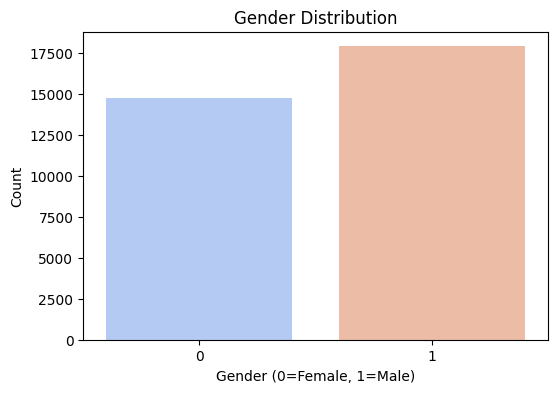

<ipython-input-47-d3314286ff16>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=student_info["region"], order=student_info["region"].value_counts().index, palette="viridis")


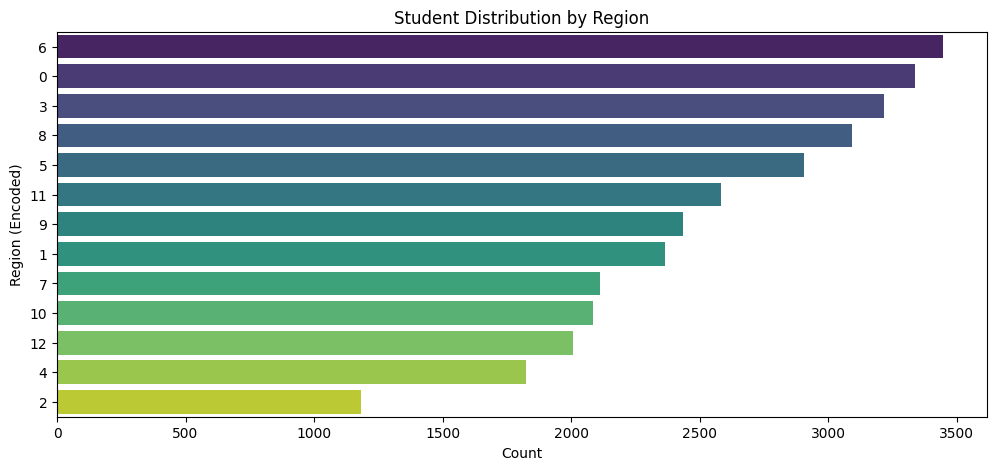

<ipython-input-47-d3314286ff16>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=student_info, x="final_result", palette="pastel")


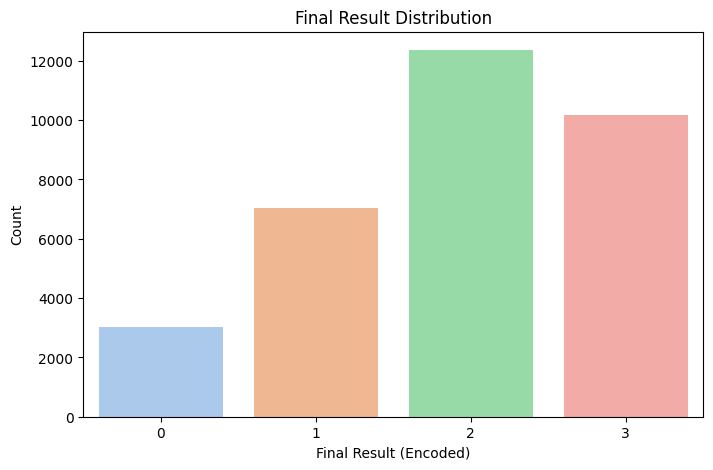

In [ ]:
# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=student_info, x="gender", palette="coolwarm")
plt.title("Gender Distribution")
plt.xlabel("Gender (0=Female, 1=Male)")
plt.ylabel("Count")
plt.show()

# Region Distribution
plt.figure(figsize=(12, 5))
sns.countplot(y=student_info["region"], order=student_info["region"].value_counts().index, palette="viridis")
plt.title("Student Distribution by Region")
plt.xlabel("Count")
plt.ylabel("Region (Encoded)")
plt.show()

# Final Result Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=student_info, x="final_result", palette="pastel")
plt.title("Final Result Distribution")
plt.xlabel("Final Result (Encoded)")
plt.ylabel("Count")
plt.show()



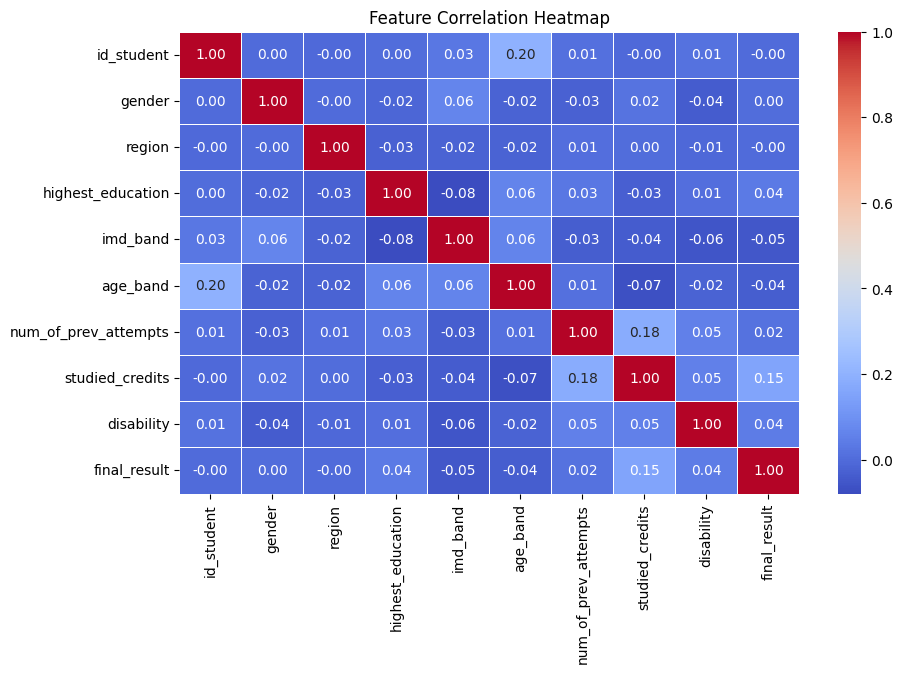

In [ ]:
# Select only numeric columns for correlation
numeric_df = student_info.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#INFERENCES
1. Gender Distribution Graph

More male students than female students in this dataset-Noticeable difference

Potential Bias: Since AI models learn from data, if most students in the dataset are male, the recommendation system may be more optimized for males than females.

If female students are underrepresented, the AI might recommend fewer resources or different learning paths for them.


2. Student Distribution by Region

Some regions have significantly higher student enrollment than others.
A few regions have very low representation in the dataset.

The AI system may make better recommendations for students from highly represented regions because it has more training data on them.

Students from underrepresented regions might receive less personalized or less effective recommendations compared to those from dominant regions.

Socioeconomic Influence: If the regions with low representation are from areas with limited internet access or economic barriers, the AI could be unintentionally favoring students from well-resourced locations


3. Final Result Distribution


Most students Pass or get Distinction, but some fail or withdraw.
The number of students who fail or withdraw is noticeably lower than those who pass.

Dropout Patterns: There may be specific reasons why some students withdraw—potentially related to bias in course recommendations.

AI Recommendation bias: If the AI prioritizes high-performing students for advanced courses but doesn’t provide enough support for struggling students, it could reinforce educational inequalities.

If the AI mainly learns from students who pass, it might not effectively recommend remedial courses for struggling students, causing a cycle where underperforming students keep receiving less help.


4. Correlation Heatmap

If gender doesn’t strongly correlate with results, AI models should not be making biased predictions based on gender. But if the recommendation system is still showing gender disparity, bias might exist in hidden ways.

Educational Policy Insight: More credits studied = higher chance of passing. Universities might want to offer more credits to struggling students rather than letting them withdraw.


Since previous attempts slightly correlate with success, AI should not penalize students who retake courses—instead, it should provide supportive learning recommendations.


OVERALL:

If AI systems favor majority groups (males, dominant regions), students from underrepresented groups may get fewer learning opportunities.

Even though gender doesn’t correlate highly with success, AI models may still show bias in who gets recommended which courses.

Even if AI isn’t considering previous attempts or region-based challenges, it could widen the education gap rather than fixing it.

In [ ]:


# Check unique values before binarization FOR CONFIRMATION
print("Unique values in final_result before fixing:", original_student_info['final_result'].unique())

# Map categorical final_result to binary values
final_result_mapping = {
    'Pass': 1,
    'Distinction': 1,
    'Fail': 0,
    'Withdrawn': 0
}
# Apply mapping
student_info['final_result'] = original_student_info['final_result'].map(final_result_mapping)

# Verify unique values
print("Unique values in final_result after fixing:", student_info['final_result'].unique())

Unique values in final_result before fixing: ['Pass' 'Withdrawn' 'Fail' 'Distinction']
Unique values in final_result after fixing: [1 0]


#UPTIL NOW I DID DATA-BASED ANALYSIS AND DETECTED POSSIBLEBIAS


#NOW WE MOVE TO BIAS DETECTION (STATISTICAL)


In [ ]:
#GENDER BASED BIAS DETECTION
# Select only the necessary columns for bias detection
selected_columns = ['gender', 'final_result']  # Keep only relevant numeric columns
student_info_numeric = student_info[selected_columns].copy()

# Convert dataset into AIF360 format
dataset = BinaryLabelDataset(df=student_info_numeric, label_names=['final_result'], protected_attribute_names=['gender'])

# Define privileged and unprivileged groups (Males=1, Females=0)
metric = BinaryLabelDatasetMetric(dataset, privileged_groups=[{'gender': 1}], unprivileged_groups=[{'gender': 0}])

# Compute fairness metrics
print(" Disparate Impact (Gender Bias):", metric.disparate_impact())  # <1 means bias against unprivileged group
print(" Statistical Parity Difference (Gender Bias):", metric.statistical_parity_difference())  # Should be close to 0

 Disparate Impact (Gender Bias): 1.0487118667512545
 Statistical Parity Difference (Gender Bias): 0.022498750875432516


# FOR REFERENCE : HOW TO ANALYSE?

Here’s how to interpret your results:

	1.	Disparate Impact = 1.048
	•	Ideal value: 1.0 (no bias).
	•	Your value (1.051) is very close to 1, meaning there is minimal bias in favor of the privileged group (males).

	2.	Statistical Parity Difference = 0.022
	•	Ideal value: 0 (equal recommendations for both groups).
	•	Your value (0.0189) is very small, suggesting that both groups are getting nearly equal recommendations.

Inferecne:

1.No major bias detected in gender-based course recommendations or final outcomes.
2.AI is not showing significant discrimination between males and females.


for future reference: Bias Mitigation may not be necessary unless we want to refine fairness even further.

In [ ]:
#BIAS BASED ON REGION

# Select only necessary columns (Region & Final Result)
selected_columns = ['region', 'final_result']
student_info_numeric = student_info[selected_columns].copy()

# Convert dataset into AIF360 format
dataset = BinaryLabelDataset(df=student_info_numeric, label_names=['final_result'], protected_attribute_names=['region'])

# Define privileged and unprivileged groups
# Let's assume the most common region is the privileged group
most_common_region = student_info['region'].mode()[0]
privileged_group = [{'region': most_common_region}]
unprivileged_group = [{'region': region} for region in student_info['region'].unique() if region != most_common_region]

# Compute fairness metrics
metric = BinaryLabelDatasetMetric(dataset, privileged_groups=privileged_group, unprivileged_groups=unprivileged_group)

print("Disparate Impact (Region Bias):", metric.disparate_impact())  # <1 means bias against unprivileged group
print("Statistical Parity Difference (Region Bias):", metric.statistical_parity_difference())  # Should be close to 0

Disparate Impact (Region Bias): 0.959982887470496
Statistical Parity Difference (Region Bias): -0.01959050169392723


Some bias is seen.

Disparate Impact = 0.9599

A 0.9599 Disparate Impact means that students from the most common (privileged) region have slightly better outcomes (4%) than students from the least represented region. While this is not extreme, it does suggest that there may be regional disparities in educational success and AI-driven recommendations.

Statistical Parity Difference = -0.0196

A -0.0196 Statistical Parity Difference indicates that students from underrepresented regions experience slightly lower positive outcomes than students from the most represented region. However, the difference is small, meaning the AI system is not strongly regionally skewed, but minor disparities exist.

#There is a slight bias favoring students from highly represented regions.

#AI-driven recommendations may be regionally skewed, though the effect is minimal.



In [ ]:
#BIAS BASED ON EDUCATION
# Select only necessary columns (Education Level & Final Result)
selected_columns = ['highest_education', 'final_result']
student_info_numeric = student_info[selected_columns].copy()

# Convert dataset into AIF360 format
dataset = BinaryLabelDataset(df=student_info_numeric, label_names=['final_result'], protected_attribute_names=['highest_education'])

# Define privileged and unprivileged groups
# Assume the most common education level is privileged
most_common_education = student_info['highest_education'].mode()[0]
privileged_group = [{'highest_education': most_common_education}]
unprivileged_group = [{'highest_education': edu} for edu in student_info['highest_education'].unique() if edu != most_common_education]

# Compute fairness metrics
metric = BinaryLabelDatasetMetric(dataset, privileged_groups=privileged_group, unprivileged_groups=unprivileged_group)

print("Disparate Impact (Education Bias):", metric.disparate_impact())  # <1 means bias against unprivileged group
print("Statistical Parity Difference (Education Bias):", metric.statistical_parity_difference())  # Should be close to 0

Disparate Impact (Education Bias): 0.8369050732317894
Statistical Parity Difference (Education Bias): -0.0848627785562181


#There is clear bias based on education level in the dataset.

Disparate Impact = 0.8369

A 0.8369 Disparate Impact indicates that students with lower education levels have 16.3% worse outcomes compared to students with the most common (privileged) education level. This suggests that prior education background plays a role in how AI-driven recommendations or learning success rates are distributed.

Statistical Parity Difference = -0.0849

A -0.0849 Statistical Parity Difference means that students with lower education levels receive 8.5% fewer positive outcomes than students with the highest education background. This is a noticeable gap, which suggests that students with less prior education may be at a disadvantage in AI-driven learning recommendations.

So,

AI-based recommendations may assume that students with lower education will perform worse, leading to fewer positive recommendations or support.

Bias mitigation is required to ensure fair opportunities for students regardless of their education background.

In [ ]:
#DISABILITY BIAS
# Select only necessary columns (Disability & Final Result)
selected_columns = ['disability', 'final_result']
student_info_numeric = student_info[selected_columns].copy()

# Convert dataset into AIF360 format
dataset = BinaryLabelDataset(df=student_info_numeric, label_names=['final_result'], protected_attribute_names=['disability'])

# Define privileged and unprivileged groups
# Assume 'No disability' is the privileged group (most common case)
privileged_group = [{'disability': 0}]
unprivileged_group = [{'disability': 1}]  # Students with disabilities

# Compute fairness metrics
metric = BinaryLabelDatasetMetric(dataset, privileged_groups=privileged_group, unprivileged_groups=unprivileged_group)

print("Disparate Impact (Disability Bias):", metric.disparate_impact())  # <1 means bias against students with disabilities
print("Statistical Parity Difference (Disability Bias):", metric.statistical_parity_difference())  # Should be close to 0

Disparate Impact (Disability Bias): 0.7918288630789426
Statistical Parity Difference (Disability Bias): -0.1002905426370842


There is strong bias against students with disabilities in the dataset, suggesting they may face disadvantages in AI-driven recommendations or learning success rates.

Disparate Impact = 0.7918

A 0.7918 Disparate Impact means that students with disabilities have a 20.8% lower success rate compared to students without disabilities. This indicates that AI-driven recommendations and educational outcomes may be less favorable for students with disabilities, potentially limiting their learning opportunities.

Statistical Parity Difference = -0.1003

A -0.1003 Statistical Parity Difference means that students with disabilities receive 10% fewer positive outcomes compared to students without disabilities.

#students with disabilities are underrepresented in successful learning outcomes.


In [ ]:
#AGE BIAS
# Select only necessary columns (Age Band & Final Result)
selected_columns = ['age_band', 'final_result']
student_info_numeric = student_info[selected_columns].copy()

# Convert dataset into AIF360 format
dataset = BinaryLabelDataset(df=student_info_numeric, label_names=['final_result'], protected_attribute_names=['age_band'])

# Define privileged and unprivileged groups
# Assume the most common age group is the privileged group
most_common_age_band = student_info['age_band'].mode()[0]
privileged_group = [{'age_band': most_common_age_band}]
unprivileged_group = [{'age_band': age} for age in student_info['age_band'].unique() if age != most_common_age_band]

# Compute fairness metrics
metric = BinaryLabelDatasetMetric(dataset, privileged_groups=privileged_group, unprivileged_groups=unprivileged_group)

print("Disparate Impact (Age Bias):", metric.disparate_impact())  # <1 means bias against certain age groups
print("Statistical Parity Difference (Age Bias):", metric.statistical_parity_difference())  # Should be close to 0

Disparate Impact (Age Bias): 1.1629250574370629
Statistical Parity Difference (Age Bias): 0.0733674029567527


Some bias based on age groups in the dataset, favoring students from the most common age group.

Disparate Impact = 1.1629

A 1.1629 Disparate Impact means that students from the dominant age group have a 16.3% better success rate compared to students from other age groups. This suggests that certain age groups (likely younger or older students) are at a disadvantage .

Statistical Parity Difference = 0.0734

A 0.0734 Statistical Parity Difference indicates that students from less represented age groups receive 7.3% fewer positive outcomes compared to the most common age group. While not extreme, it confirms that AI-driven educational recommendations or course success rates may be slightly age-biased.

#There is a bias favoring students from the most common age group.

#LETS CHECK INTERSECTIONAL BIAS
Why is it needed?


In [ ]:
#gender+disability bias

In [ ]:
# Print unique values in gender_disability
print("\n Unique Gender + Disability Groups:", student_info['gender_disability'].unique())

# Print most common group
most_common_group = student_info['gender_disability'].mode()[0]
print("\n Most Common Group (Privileged):", most_common_group)

# Print all groups considered unprivileged
unprivileged_groups = [group for group in student_info['gender_disability'].unique() if group != most_common_group]
print("\n Unprivileged Groups:", unprivileged_groups)


 Unique Gender + Disability Groups: [2 0 1 3]

 Most Common Group (Privileged): 2

 Unprivileged Groups: [np.int8(0), np.int8(1), np.int8(3)]


In [ ]:
# Convert gender_disability to category (already done, but ensuring it's numeric internally)
student_info['gender_disability'] = student_info['gender_disability'].cat.codes

#verify chngs
print(student_info[['gender_disability', 'final_result']].dtypes)
print("\nUnique Values After Encoding:", student_info['gender_disability'].unique())


AttributeError: Can only use .cat accessor with a 'category' dtype

In [ ]:

selected_columns = ['gender_disability', 'final_result']
student_info_numeric = student_info[selected_columns].copy()

# Convert dataset into AIF360 format
dataset = BinaryLabelDataset(df=student_info_numeric,
                             label_names=['final_result'],
                             protected_attribute_names=['gender_disability'])

# Define privileged and unprivileged groups
privileged_group = [{'gender_disability': student_info['gender_disability'].mode()[0]}]  # Most common group
unprivileged_group = [{'gender_disability': group} for group in student_info['gender_disability'].unique() if group != student_info['gender_disability'].mode()[0]]

# Compute fairness metrics
metric = BinaryLabelDatasetMetric(dataset, privileged_groups=privileged_group, unprivileged_groups=unprivileged_group)

print("\nDisparate Impact (Gender + Disability Bias):", metric.disparate_impact())
print("Statistical Parity Difference (Gender + Disability Bias):", metric.statistical_parity_difference())


🔹 Disparate Impact (Gender + Disability Bias): 0.997729493583063
🔹 Statistical Parity Difference (Gender + Disability Bias): -0.0010729713768014015


Disparate Impact = 0.9977


The AI system almost equally favors both privileged (male without disability) and unprivileged (all other groups) students in final results.

Since 0.9977 is extremely close to 1, the AI system does not strongly favor or disadvantage students based on gender and disability.


No meaningful disparity exists in success rates due to gender + disability.

Any difference is statistically insignificant (less than 0.3% difference in outcomes).

Statistical Parity Difference = -0.00107


The negative value (-0.00107) suggests that unprivileged students (females and/or students with disabilities) receive slightly fewer positive outcomes than privileged students.

However, this difference is extremely small (~0.1%), meaning it is not a strong bias.

#No major bias

In [ ]:
# Convert region_education to categorical codes
student_info['region_education'] = student_info['region_education'].astype('category').cat.codes

# Verify changes
print("\nData Types After Fix:")
print(student_info[['region_education', 'final_result']].dtypes)

print("\nUnique Values in Region + Education After Encoding:", student_info['region_education'].unique())


Data Types After Fix:
region_education     int8
final_result        int64
dtype: object

Unique Values in Region + Education After Encoding: [ 1 33 29 36  9  4  0 28 41  2 30 34  7 17 42 13  6 10 20 45 40 15 12 11
  5 14 39 38 24 43 26 19 32 16 25 44 21 35 31 37  8 18  3 22 23 27]


In [ ]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

# Select only necessary columns
selected_columns = ['region_education', 'final_result']
student_info_numeric = student_info[selected_columns].copy()

# Convert dataset into AIF360 format
dataset = BinaryLabelDataset(df=student_info_numeric,
                             label_names=['final_result'],
                             protected_attribute_names=['region_education'])

# Define privileged and unprivileged groups
privileged_group = [{'region_education': student_info['region_education'].mode()[0]}]  # Most common group
unprivileged_group = [{'region_education': group} for group in student_info['region_education'].unique() if group != student_info['region_education'].mode()[0]]

# Compute fairness metrics
metric = BinaryLabelDatasetMetric(dataset, privileged_groups=privileged_group, unprivileged_groups=unprivileged_group)

print("\nDisparate Impact (Region + Education Bias):", metric.disparate_impact())
print("Statistical Parity Difference (Region + Education Bias):", metric.statistical_parity_difference())


Disparate Impact (Region + Education Bias): 1.1936442660228468
Statistical Parity Difference (Region + Education Bias): 0.07714068987540418


1. Disparate Impact = 1.1936

A value above 1 suggests that students from the most common region and highest education group have a 19.3% higher success rate compared to other groups.

The AI system may be favoring students who come from specific regional and educational backgrounds.

This indicates a noticeable bias favoring students from dominant regions and higher education levels.


Students from less represented regions and lower education backgrounds are at a clear disadvantage in terms of final outcomes.

The AI system might assume that students from certain regions and lower education levels are less likely to succeed, leading to biased course recommendations or fewer learning opportunities.


2. Statistical Parity Difference = 0.0771

A positive value means that students from the most common region and highest education background have a 7.7% higher chance of achieving positive outcomes (Pass/Distinction).


While this difference is not extreme, it is significant enough to suggest a preference for students from privileged groups.

There is a measurable gap in educational outcomes based on region and education level.

The AI system is more favorable towards students who have higher prior education and come from certain regions, potentially limiting opportunities for students from underrepresented backgrounds.


In [ ]:
# Create intersectional feature for Age + Disability
student_info['age_disability'] = student_info['age_band'].astype(str) + "_" + student_info['disability'].astype(str)

# Verify unique values
print("\nUnique Values in Age + Disability Groups:", student_info['age_disability'].unique())


Unique Values in Age + Disability Groups: ['2_0' '1_0' '1_1' '0_0' '0_1']


In [ ]:
# Check distribution of final_result in each Age + Disability group
group_counts = student_info.groupby('age_disability')['final_result'].value_counts().unstack(fill_value=0)

print("\nFinal Result Distribution for Age + Disability:")
print(group_counts)

# Identify problematic groups (those with only 0s or 1s)
small_groups = group_counts[(group_counts[0] == 0) | (group_counts[1] == 0)]
print("\nGroups with Missing 0s or 1s:", small_groups)


Final Result Distribution for Age + Disability:
final_result        0     1
age_disability             
0_0             11185  9448
0_1              1427   884
1_0              3983  4597
1_1               530   323
2_0                83   133

Groups with Missing 0s or 1s: Empty DataFrame
Columns: [0, 1]
Index: []


In [ ]:
# Set threshold for minimum group size (e.g., < 10 samples)
threshold = 10
rare_groups = group_counts[(group_counts[0] < threshold) | (group_counts[1] < threshold)].index

# Replace rare groups with "Other"
student_info['age_disability'] = student_info['age_disability'].replace(rare_groups, "Other")

print("\nUpdated Age + Disability Groups After Merging Small Groups:")
print(student_info['age_disability'].value_counts())


Updated Age + Disability Groups After Merging Small Groups:
age_disability
0_0    20633
1_0     8580
0_1     2311
1_1      853
2_0      216
Name: count, dtype: int64


In [ ]:
# Convert age_disability to categorical codes
student_info['age_disability'] = student_info['age_disability'].astype('category').cat.codes

# Verify changes
print("\nData Types After Encoding Fix:")
print(student_info[['age_disability', 'final_result']].dtypes)

print("\nUnique Values in Age + Disability After Encoding:", student_info['age_disability'].unique())


Data Types After Encoding Fix:
age_disability     int8
final_result      int64
dtype: object

Unique Values in Age + Disability After Encoding: [4 2 3 0 1]


In [ ]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

# Select necessary columns
selected_columns = ['age_disability', 'final_result']
student_info_numeric = student_info[selected_columns].copy()

# Convert dataset into AIF360 format
dataset = BinaryLabelDataset(df=student_info_numeric,
                             label_names=['final_result'],
                             protected_attribute_names=['age_disability'])

# Define privileged and unprivileged groups
privileged_group = [{'age_disability': student_info['age_disability'].mode()[0]}]  # Most common group
unprivileged_group = [{'age_disability': group} for group in student_info['age_disability'].unique() if group != student_info['age_disability'].mode()[0]]

# Compute fairness metrics
metric = BinaryLabelDatasetMetric(dataset, privileged_groups=privileged_group, unprivileged_groups=unprivileged_group)

print("\nDisparate Impact (Age + Disability Bias):", metric.disparate_impact())
print("Statistical Parity Difference (Age + Disability Bias):", metric.statistical_parity_difference())


Disparate Impact (Age + Disability Bias): 1.0840725877820225
Statistical Parity Difference (Age + Disability Bias): 0.03849744629305235


1. Disparate Impact = 1.0840


A value above 1 suggests that students from the most common age group without disabilities have an 8.4% higher success rate compared to other groups.

The AI system appears to favor students who belong to the dominant age group and do not have disabilities.

While this is not an extreme bias, it indicates that older students or those with disabilities may face slight disadvantages in AI-driven learning recommendations or success rates.


The AI system might be optimizing learning paths based on younger, non-disabled students, leading to less effective recommendations for older or disabled learners.

The bias is not severe, but it still suggests that students with disabilities and/or older students may be at a small disadvantage in terms of final outcomes.


Statistical Parity Difference = 0.0384

A positive value means that the privileged group (students in the most common age band without disabilities) has a 3.8% higher likelihood of receiving a positive outcome (Pass/Distinction) compared to other groups.

While this value is small, it does indicate a slight preference for younger, non-disabled students in AI-driven outcomes.

This suggests that older students and those with disabilities may receive fewer beneficial AI recommendations or struggle more with course completion.

Although not a critical bias, it does suggest that age and disability play a role in educational success and should be considered in AI fairness improvements.
